In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization in Python
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python\Projects\Exploratory Data Analysis - UrbanMart Sales\UrbanMart Sales Data.csv", encoding='unicode_escape')
df.shape

(11251, 15)

In [7]:
pd.set_option('display.max_rows', 11251)

# Data Cleaning

In [8]:
#Viewing first 10 rows
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
#Dropping unwanted columns
df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [27]:
#Checking Null Values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [23]:
#Dropping Null Values
df.dropna(inplace= True)

In [34]:
#Changing Data Type of a column
df['Amount'] = df['Amount'].astype('int')

In [36]:
df['Amount'].dtype

dtype('int32')

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [44]:
#Renaming Column name
df.rename(columns= {'Cust_name':'Customer_name'}, inplace= True)

In [46]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#Returns description of the data in the dataframe (i.e count, mean, std, etc)
df.describe()

In [48]:
#Returning description for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [65]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

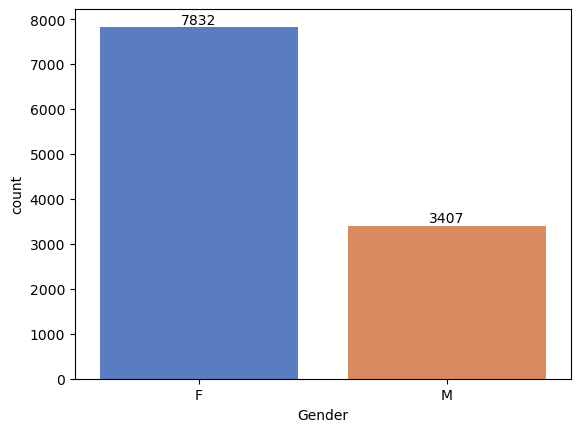

In [147]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df, palette='muted', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [167]:
df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


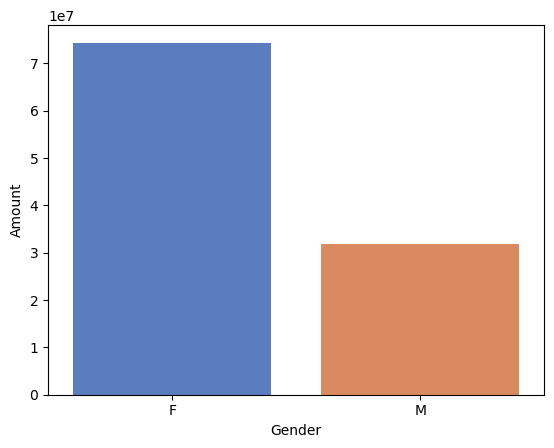

In [165]:
sales_gen = df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Gender', y= 'Amount', data = sales_gen, palette='muted', hue = 'Gender')
plt.show()

#### *From above graphs we can see that most of the buyers are females and even the purchasing power of females is greater that males*

# Age

In [176]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

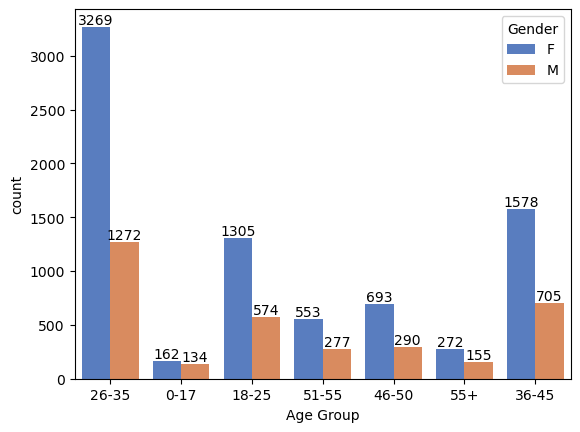

In [186]:
ax = sns.countplot(x = 'Age Group',data = df, palette='muted', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

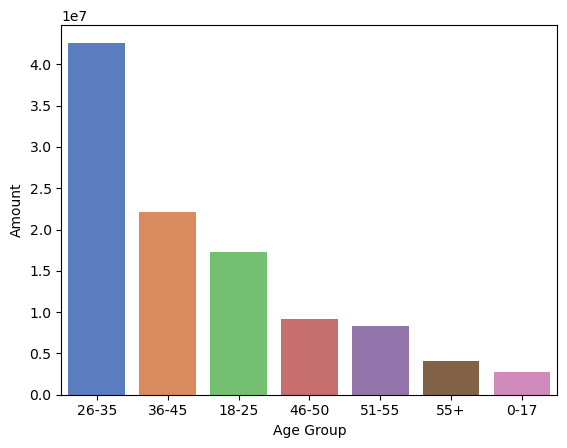

In [190]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, palette='muted', hue = 'Age Group')
plt.show()

#### *From above graphs we can see that most of the buyers are of age group between 26-35 years female*

# State

In [197]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

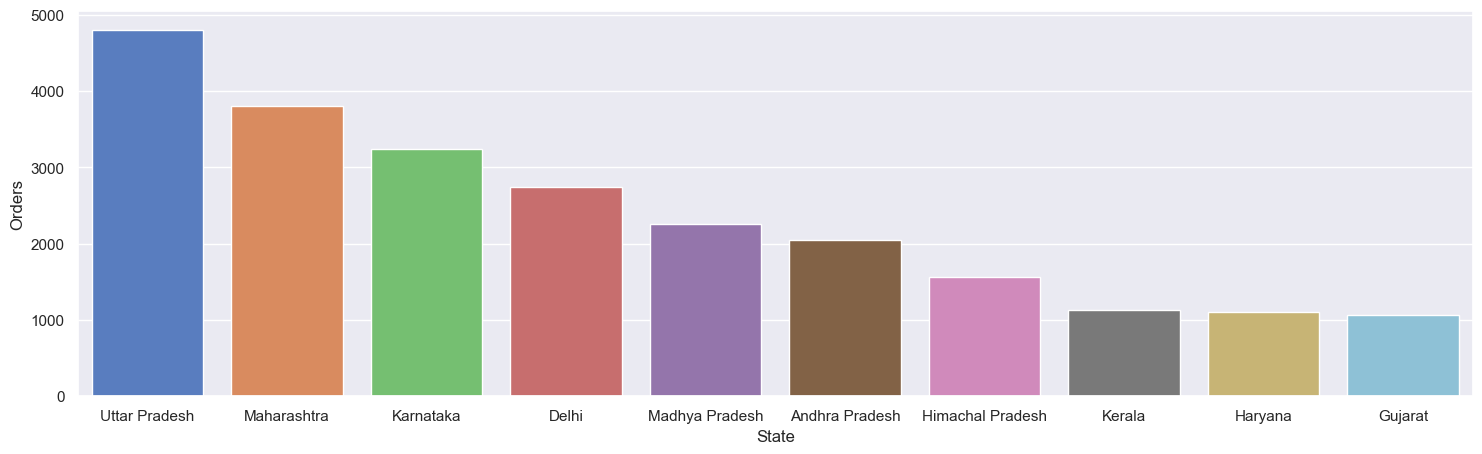

In [211]:
#Total number of order from Top 10 States
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(x = 'State', y = 'Orders',data = sales_state, palette = 'muted', hue = 'State')
plt.show()

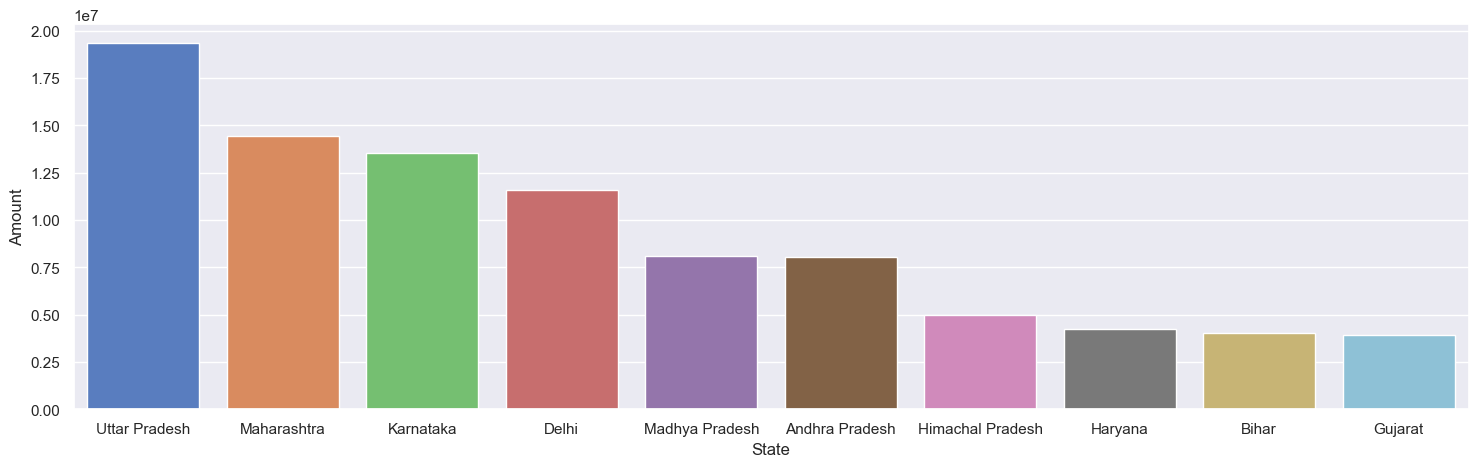

In [213]:
#Total amount/sales from Top 10 States
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(x = 'State', y = 'Amount',data = sales_state, palette = 'muted', hue = 'State')
plt.show()

#### *From above graphs, we can see that most of the orders and total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

In [223]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

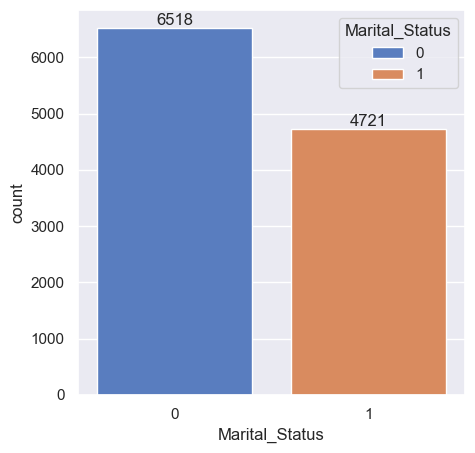

In [241]:
ax = sns.countplot(x = 'Marital_Status',data = df, palette='muted', hue = 'Marital_Status')

sns.set(rc = {'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

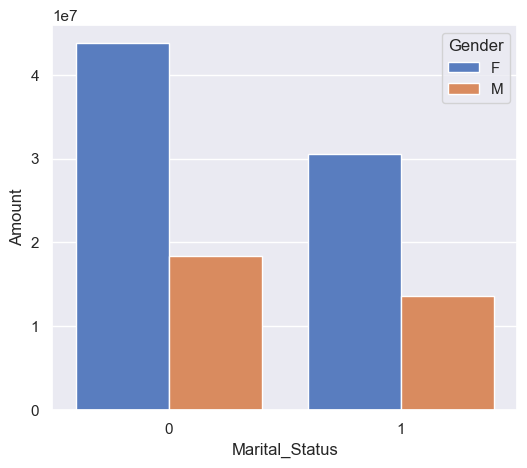

In [243]:
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount',data = sales_marital, palette = 'muted', hue = 'Gender')
plt.show()

#### *From the above graphs, we can see that most of the buyers are married women and have highest purchasing power*

## Occupation

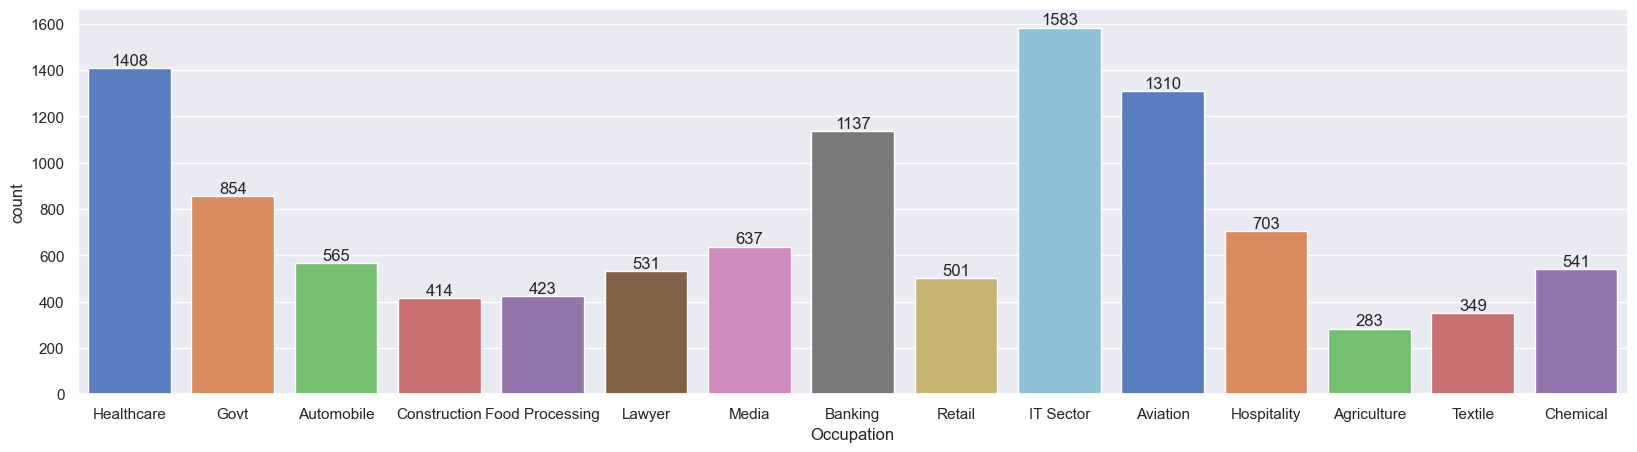

In [249]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation',data = df, palette='muted', hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

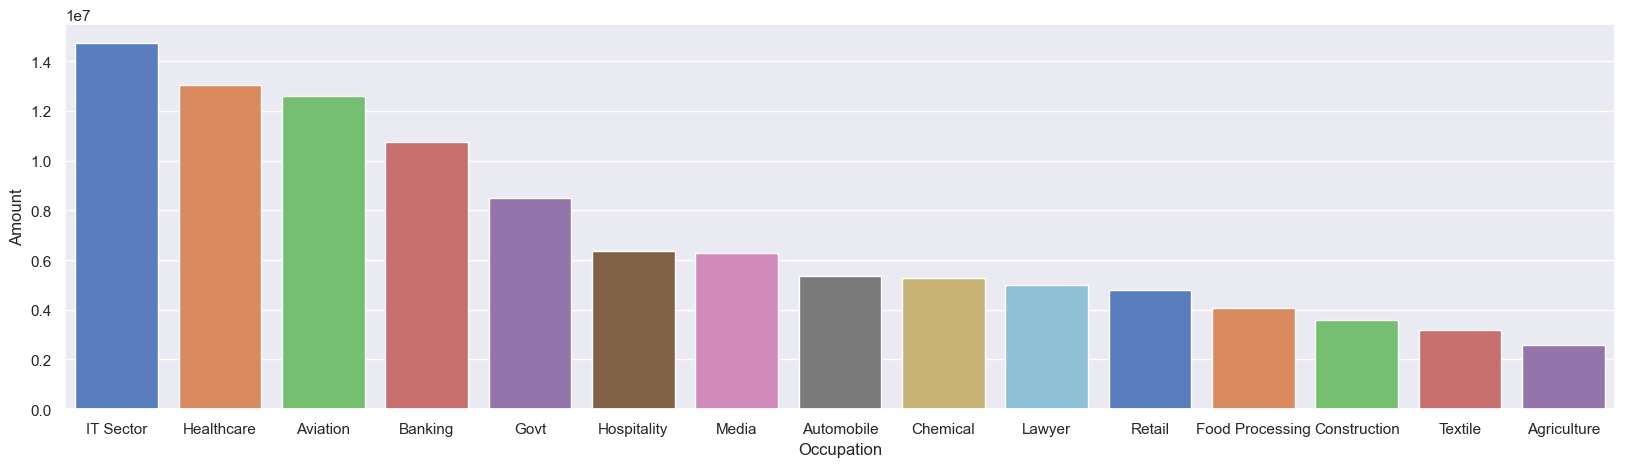

In [253]:
sns.set(rc = {'figure.figsize':(20,5)})
sales_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.barplot(x = 'Occupation', y = 'Amount',data = sales_occupation, palette = 'muted', hue = 'Occupation')
plt.show()

#### *From the above graphs, we can see that most of the buyers are from IT, Healthcare and Aviation Sector*

# Product Category

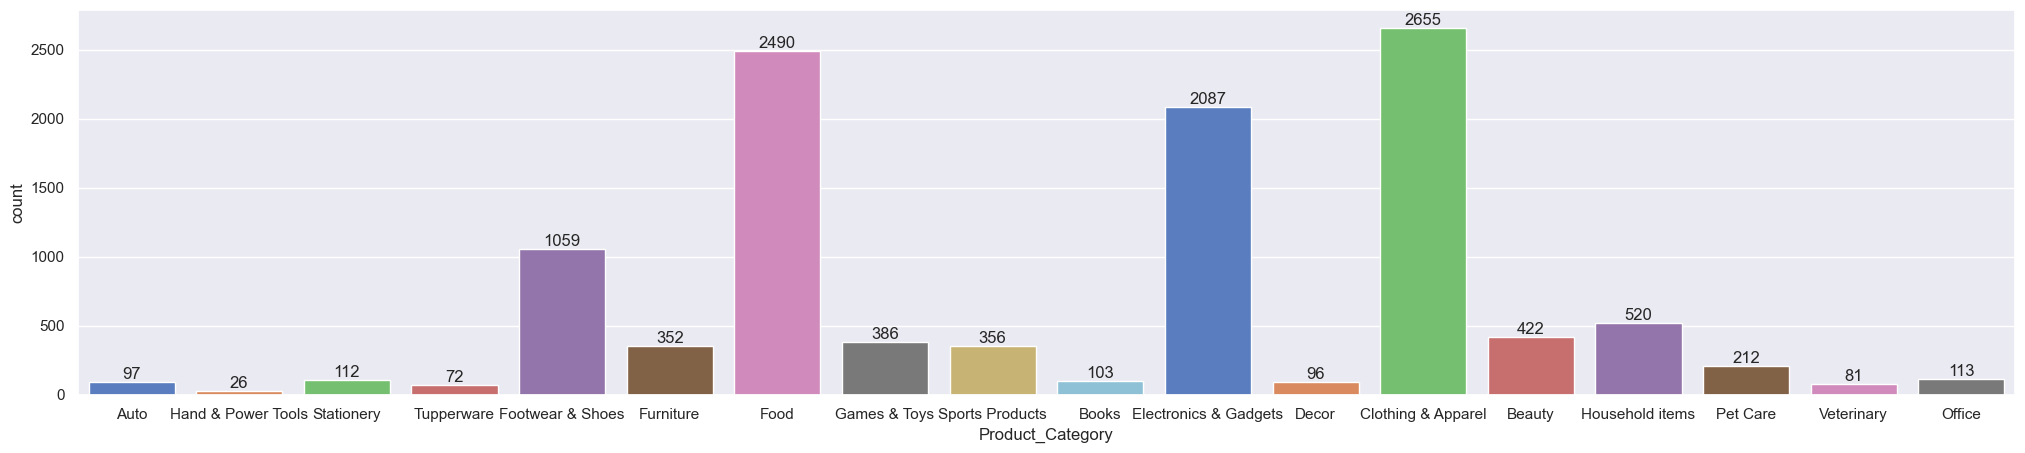

In [260]:
sns.set(rc = {'figure.figsize':(25,5)})
ax = sns.countplot(x = 'Product_Category',data = df, palette='muted', hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

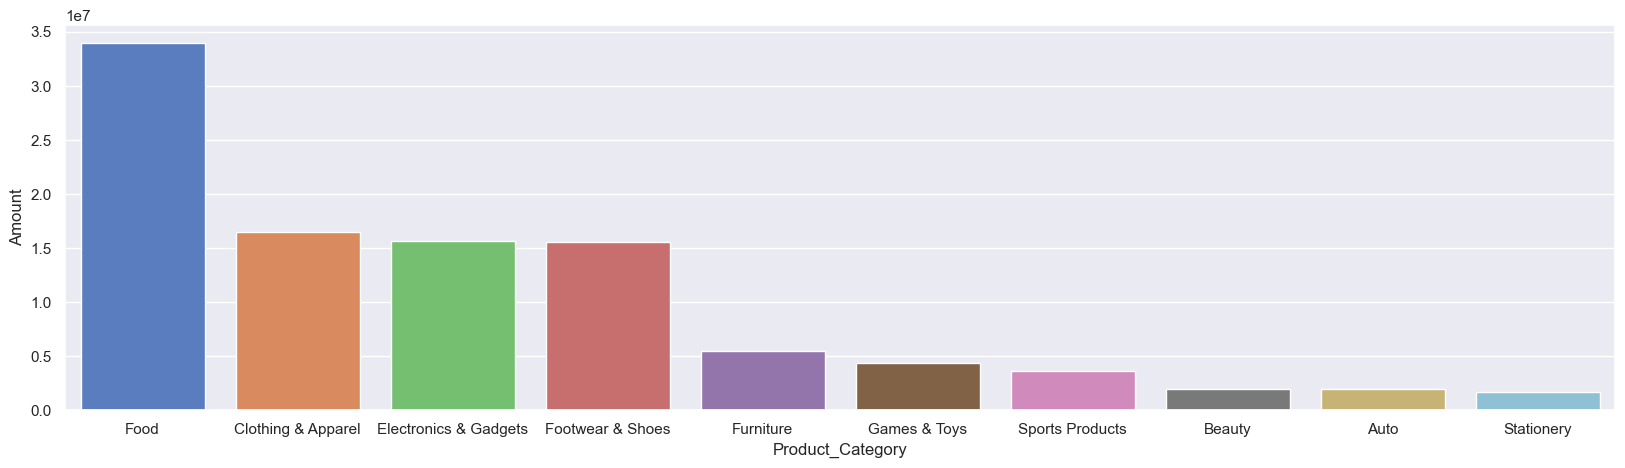

In [264]:
sns.set(rc = {'figure.figsize':(20,5)})
sales_occupation = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.barplot(x = 'Product_Category', y = 'Amount',data = sales_occupation, palette = 'muted', hue = 'Product_Category')
plt.show()

#### From the above graphs, we can see that most of the sold products are Clothing, Food and Electronics respectively, whereas the most sales generated by products are Food, Clothing and Electronics respectively

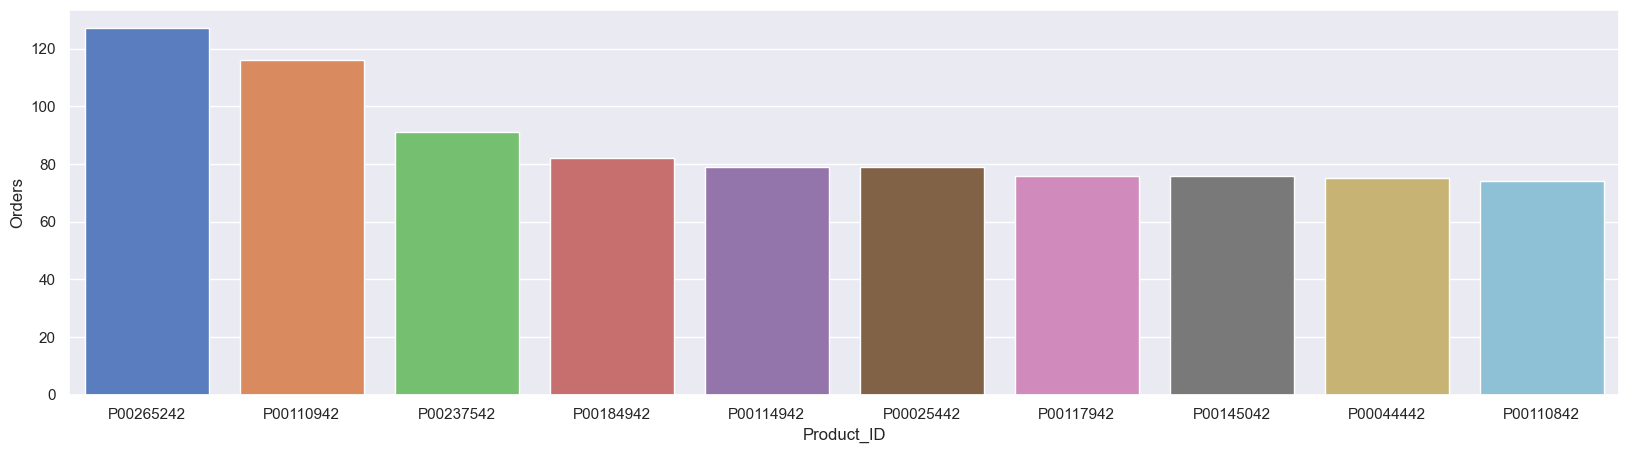

In [267]:
#Top 10 Selling Products
sns.set(rc = {'figure.figsize':(20,5)})
Top_10_Products = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.barplot(x = 'Product_ID', y = 'Orders',data = Top_10_Products, palette = 'muted', hue = 'Product_ID')
plt.show()

## Conclusion:

#### *Married Women, Age Group - 26-35 years, from UP, Maharasthra and Karnataka working in IT, Healthcare and Aviation sector are more likely to buy products from Food, Clothing and Electronics Category*